# Figure drawing functions for RPB 

This notebook generates figures 4.2, 4.3, 4.4, and 4.5 in chapter 4 in Jialu's thesis. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from RPB_model_countercurrent import *

## Figure 4.2 

MO objectives change with budgets

In [2]:
def read_fim(pre_name, after_name, x_ranges):
    """Read all FIMs in the given ranges, and return the log10(A)- and log10(D)-optimality
    
    Arguments 
    ---------
    pre_name: string, file name pre string 
    after_name: string, file name string after the budget 
    x_ranges: a range of budgets 
    
    Return 
    ------
    a_ranges: a list including log10(trace) of the given budget ranges 
    d_ranges: a list including log10(determinant) of the given budget ranges 
    """
    # initialize A- and D-optimality ranges 
    a_ranges, d_ranges = [], []
    # loop over every budget
    for i in x_ranges:
        # assemble file string names 
        name = pre_name + str(i) + after_name
        # read FIM
        with open(name, 'rb') as f:
            fim = pickle.load(f)
            f.close()
        # get A-optimality ranges and D-optimality ranges
        a_ranges.append(np.log10(np.trace(fim)))
        d_ranges.append(np.log10(np.linalg.det(fim)))
    return a_ranges, d_ranges


In [8]:
# budget ranges used for the paper 
x_set = [ 2000, 2500, 3000, 3500, 4000, 4500, 5000, 
        6000, 7000, 8000,9000,10000] 
# A- and D-optimality ranges
milp_a, milp_d = read_fim("./Countercurrent_results/MO_MILP_solution/updated_fim_", # string name
                          "", # no string after the budget
                          x_set) # budget ranges
print(milp_a, milp_d)

[9.732093014607184, 9.77480216112448, 9.808792591406771, 9.838793418714772, 9.866033621993497, 9.891178066825255, 9.914258483567508, 9.954280356814856, 9.99403001321937, 10.020403228924492, 10.054754900183495, 10.074284218409607] [13.57838298379182, 15.386500919101064, 15.56777735385663, 16.5303900490576, 16.823529170505108, 17.31280490606632, 17.500045583482198, 18.13037276601848, 18.587507617709473, 19.36148092114499, 19.782723591202075, 19.656861801509468]


In [18]:
def plot_MO_data(x=None, a_nlp=None, d_nlp=None, 
             objective = "A", benchmark_x=None, benchmark_a=None, benchmark_d=None, save=None):
    """
    objective means these solutions are based on what objective function. 
    For e.g., if it's A, it means it's A-optimality solution. We can still analyze its determinant value. 
    
    Arguments
    ---------
    x: budget range 
    a_nlp: log10(trace) of all budgets 
    d_nlp: log10(det) of all budgets 
    objective: "A" for A-optimality, "D" for D-optimality 
    benchmark_x: benchmark solution budgets 
    benchmark_a: benchmark solution A-optimality 
    benchmark_d: benchmark solution D-optimality 
    save: if True, save the fig
    """
    # set up legends for NLP
    label_nlp = "NLP: A-optimality"
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=200
        
    # set up fonts 
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    si_legend = 16
        
    # A-optimality figure
    # A-optimality MO solution 
    if a_nlp is not None:
        plt.scatter(x, a_nlp, color=color_minlp, 
                 s=marker_size, marker=scatter_minlp, label=label_nlp)
    # A-optimality benchmark solution 
    if benchmark_a is not None:
        plt.scatter(benchmark_x, benchmark_a, color = color_nlp, s=marker_size, marker=scatter_nlp)
           
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # D-optimality optimal solution 
    # D-optimality MO solution 
    if d_nlp is not None: 
        #plt.plot(x, d_nlp, linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
        plt.scatter(x, d_nlp, color=color_minlp, 
                 s=marker_size, marker=scatter_minlp, label=label_nlp)
    # D-optimality benchmark solution
    if benchmark_d is not None:
        plt.scatter(benchmark_x, benchmark_d, color = color_nlp, s=marker_size, marker=scatter_nlp)
    
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()


In [14]:
def load_pickle(name): 
    """Used for loading data from pickle file 
    """
    file = open(name, "rb")
    data = pickle.load(file)
    file.close()
    return data
def save_pickle(data, name):
    """Used for saving data to pickle file 
    """
    file = open(name, "wb")
    pickle.dump(data, file)
    file.close()

In [16]:
# benchmark ranges 
ben_a = [1.6, 2.6, 3.6, 4.6, 5.4, 6.4]

# benchmark A-optimality solutions 
a = load_pickle("./Countercurrent_results/MO_MILP_solution/benchmark_a")
# benchmark D-optimality solutions
d = load_pickle("./Countercurrent_results/MO_MILP_solution/benchmark_a")

a = [np.log10(i) for i in a]
d = [np.log10(i) for i in d]

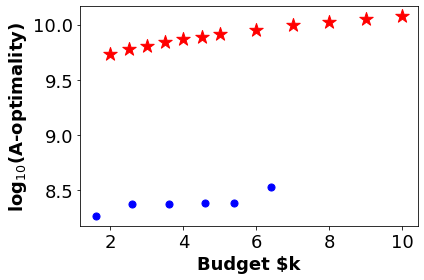

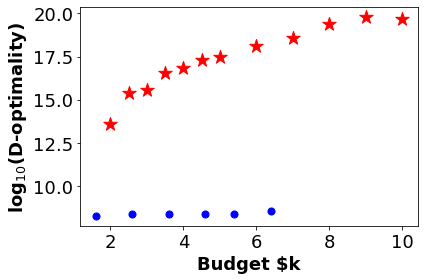

In [19]:
plot_MO_data(x=[i/1000 for i in x_set], a_nlp=milp_a, d_nlp=milp_d, 
             objective = "A", 
          benchmark_x = ben_a, 
          benchmark_a = a, 
          benchmark_d = d, 
          save="MILP")


## Figure 4.4 MBDoE heatmap 

In [20]:
def heatmap(
        cri_a, 
        cri_d, 
        title_text,
        xlabel_text,
        ylabel_text,
        font_axes=18,
        font_tick=18,
        log_scale=True,
        save=None
    ):
    """
    Draw heatmap. Adapted from Pyomo.DoE: 
    https://github.com/Pyomo/pyomo/blob/9608e0e649b0f7763cc65d2232da8aeb5899f156/pyomo/contrib/doe/result.py#L603
    
    Arguments
    ----------
    cri_a: A-optimality in the range 
    cri_d: D-optimality in the range
    title_text: name of the figure, a string
    xlabel_text: x label title, a string.
        In a 2D heatmap, it should be the second design variable in the design_ranges
    ylabel_text: y label title, a string.
        In a 2D heatmap, it should be the first design variable in the dv_ranges
    font_axes: axes label font size
    font_tick: tick label font size
    log_scale: if True, the result matrix will be scaled by log10

    Returns
    --------
    4 Figures of 2D heatmap for each criteria
    """
    # decide if log scaled
    if log_scale:
        hes_a = np.log10(cri_a)
        hes_d = np.log10(cri_d)
    else:
        hes_a = cri_a
        hes_d = cri_d

    # set heatmap x,y ranges
    xLabel = x_range
    yLabel = y_range

    # A-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_a, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log$_{10}$(trace(FIM))')
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()

    # D-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_d, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log$_{10}$(det(FIM))')
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()

In [22]:
res_a = load_pickle("./Countercurrent_results/MBDoE_results/heatmap_a")
res_d = load_pickle("./Countercurrent_results/MBDoE_results/heatmap_d")

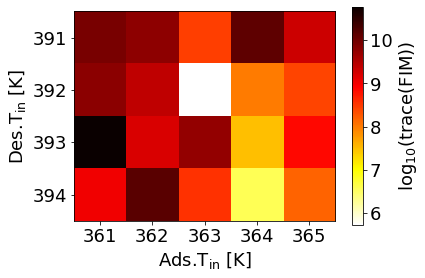

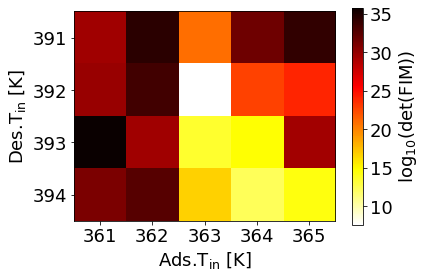

In [23]:
# specify x, y ranges
x_range = [361, 362, 363, 364, 365]
y_range = [391, 392, 393, 394]


heatmap(res_a, res_d, "heatmap-", "Ads.T$_{in}$ [K]", "Des.T$_{in}$ [K]", log_scale=False, 
        save="heatmap-")

## Figure 4.3 

In [22]:
def full_contactor_plotting(blk, with_legend=True,  save_option=False):
    """
    Plot 2D figures for model profiles 
    
    Argument 
    --------
    blk: a solved model 
    with_legend: if True, the legend is displayed on the figure 
    save_option: if Ture, the figures are saved 
    """
    # z locations 
    z = list(blk.ads.z)
    # theta locations 
    theta = list(blk.ads.o)
    # compute the total normal value of theta 
    theta_total_norm = [j * blk.ads.theta() for j in blk.ads.o] + [
        j * blk.des.theta() + blk.ads.theta() for j in blk.des.o
    ][1:]

    # measured z locations 
    z_query = [0, 0.01, 0.027, 0.071, 0.188, 0.403, 0.597, 0.812, 0.929, 0.973, 0.99, 1.0]
    # retrieve nodes 
    z_nodes = [blk.ads.z.find_nearest_index(z) for z in z_query]

    # measured theta locations 
    theta_query = [0.08, 0.17, 0.2, 0.3, 0.36, 0.4, 0.5, 0.6, 0.7, 0.8] 
    # retrive theta nodes 
    theta_nodes = [blk.ads.o.find_nearest_index(o) for o in theta_query]
    print(theta_nodes)
    
    # fonts 
    label_font = 18
    si_legend = 14
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)


    ## Desorber Gas phase CO2 mole fraction
    y_CO2 = [[], [], [], [], [], [], [], [], [], []]
    k = 0
    for j in theta_nodes:
        for i in z:
            y_CO2[k].append(blk.des.y["CO2", i, theta[j]]())
        k += 1

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Normalized axial distance", fontsize=label_font)
    ax.set_ylabel("Des. gas phase Y$_{CO_2}$", fontsize=label_font)
    for i in range(len(theta_nodes)):
        ax.plot(
            z, y_CO2[i], "-o", label="r=" + str(round(theta[theta_nodes[i]], 2))
        )
    if with_legend:
        ax.legend(fontsize=si_legend)
    plt.tight_layout()
    if save_option:
        fig.savefig("CO2_molefraction_des.pdf")

    ## Adsorber Gas Temperature
    Tg =[[], [], [], [], [], [], [], [], [], []]
    k = 0
    for j in theta_nodes:
        for i in z:
            Tg[k].append(blk.ads.Tg[i, theta[j]]())
        k += 1

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Normalized axial distance", fontsize=label_font)
    ax.set_ylabel("Ads. gas temperature [K]", fontsize=label_font)
    # ax.set_title('Adsorption gas phase CO$_{2}$')
    for i in range(len(theta_nodes)):
        ax.plot(z, Tg[i], "-o", label="r=" + str(round(theta[theta_nodes[i]], 2)))
    if with_legend:
        ax.legend(fontsize=si_legend)
    plt.tight_layout()
    if save_option:
        fig.savefig("GasTemp_ads.pdf")

    ## Desorber Gas Temperature
    Tg = [[], [], [], [], [], [], [], [], [], []]
    k = 0
    for j in theta_nodes:
        for i in z:
            Tg[k].append(blk.des.Tg[i, theta[j]]())
        k += 1

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Normalized axial distance", fontsize=label_font)
    ax.set_ylabel("Des. gas temperature [K]", fontsize=label_font)
    for i in range(len(theta_nodes)):
        ax.plot(z, Tg[i], "-o", label="r=" + str(round(theta[theta_nodes[i]], 2)))
    if with_legend:
        ax.legend()
    plt.tight_layout()
    if save_option:
        fig.savefig("GasTemp_des.pdf")

    # Adsorber Gas Velocity
    vel = [[], [], [], [], [], [], [], [], [], []]
    k = 0
    for j in theta_nodes:
        for i in z:
            vel[k].append(blk.ads.vel[i, theta[j]]())
        k += 1

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Normalized axial distance", fontsize=label_font)
    ax.set_ylabel("Ads. gas velocity [m/s]", fontsize=label_font)
    # ax.set_title('Adsorption gas phase CO$_{2}$')
    for i in range(len(theta_nodes)):
        ax.plot(z, vel[i], "-o", label="r=" + str(round(theta[theta_nodes[i]], 2)))
    if with_legend:
        ax.legend(fontsize=si_legend)
    plt.tight_layout()
    if save_option:
        fig.savefig("GasVel_ads.pdf")

    ## Desorber Gas Velocity
    vel = [[], [], [], [], [], [], [], [], [], []]
    k = 0
    for j in theta_nodes:
        for i in z:
            vel[k].append(blk.des.vel[i, theta[j]]())
        k += 1

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Normalized axial distance", fontsize=label_font)
    ax.set_ylabel("Des. gas velocity [m/s]", fontsize=label_font)
    # ax.set_title('Adsorption gas phase CO$_{2}$')
    for i in range(len(theta_nodes)):
        ax.plot(z, vel[i], "-o", label="r=" + str(round(theta[theta_nodes[i]], 2)))
    if with_legend:
        ax.legend(fontsize=si_legend)
    plt.tight_layout()
    if save_option:
        fig.savefig("GasVel_des.pdf")

    plt.show()
    
    return y_CO2

In [12]:
def model_plot_Tg_RKH(m):
    """This function plots the 3D model profile for Tg 
    
    Argument
    --------
    m: a solved RPB model 
    """
    # z locations 
    z = list(m.z)
    # theta locations 
    theta = list(m.o)
    # initialize Tg
    Tg = [[]]
    for j in theta:
        Tg.append([])
    # retrieve Tg value 
    Tg.pop()
    k = 0
    for j in theta:
        for i in z:
            Tg[k].append(m.Tg[i, j]())
        k += 1

    X, Y = np.meshgrid(theta, z)
    Tg = np.asarray(Tg)

    ax = plt.axes(projection='3d')
    ax.plot_surface(Y, X, Tg.T, 
            cmap='viridis', edgecolor='none')
    plt.savefig("gas_T_3D.pdf")

    plt.show()
    
def model_plot_CO2g_RKH(m):
    """This function plots the 3D model profile for yCO2 
    
    Argument
    --------
    m: a solved RPB model 
    """
    # z locations 
    z = list(m.z)
    # theta locations 
    theta = list(m.o)
    # initialize y_CO2
    y_CO2 = [[]]
    for j in theta:
        y_CO2.append([])
    # retrieve yCO2 values
    y_CO2.pop()
    k = 0
    for j in theta:
        for i in z:
            y_CO2[k].append(m.y["CO2", i, j]())
        k += 1
    # retrieve yCO2 value at theta=0.35
    y_CO2_35 = []
    for i in z:
        y_CO2_35.append(m.y["CO2", i, 0.348611]())
    # retrieve yCO2 value at theta=0.4
    y_CO2_40 = []
    for i in z:
        y_CO2_40.append(m.y["CO2", i, 0.3983333333333333]())
    
    X, Y = np.meshgrid(theta, z)
    y_CO2 = np.asarray(y_CO2)

    ax = plt.axes(projection='3d')
    ax.plot_surface(Y, X, y_CO2.T, 
                    rstride=1, cstride=1,
            cmap='viridis', edgecolor='none', zorder=1)
    plt.tight_layout()
    plt.savefig("y_CO2_3D.pdf")

    plt.show()

In [2]:
# create pyomo model
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

In [5]:
# load the base case solution 
from_json(RPB, fname="./Countercurrent_results/MBDoE_results/Tgin_des_393/Tgin_ads_363/Tgads363_Tgdes393_base.json.gz", gz=True)

WARNING (W1002): Setting Var 'ads.P[0,0]' to a numeric value `1.250714`
outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0,0.005]' to a numeric value
`1.2507139999995454` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0,0.007670637023171957]' to a numeric
value `1.2507139999997727` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0,0.01176773446825126]' to a numeric value
`1.2507139999995454` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0,0.01805320393820497]' to a numeric value
`1.250713999999318` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ad

WARNING (W1002): Setting Var 'ads.P[0.016306894089533095,0]' to a numeric
value `1.2472323462305361` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.016306894089533095,0.005]' to a numeric
value `1.2475068909051366` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var
'ads.P[0.016306894089533095,0.007670637023171957]' to a numeric value
`1.247463073747425` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.016306894089533095,0.01176773446825126]'
to a numeric value `1.2474099183660499` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.016306894089533095,0.01805320393820497]'
to a numeric value `1.2473505096701507` outside the bounds (0.99, 1.2

WARNING (W1002): Setting Var 'ads.P[0.026591479484724942,0.7961111111111111]'
to a numeric value `1.2448195876859633` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.026591479484724942,0.8955555555555555]'
to a numeric value `1.2448403631968938` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.026591479484724942,0.995]' to a numeric
value `1.2448488014095056` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.026591479484724942,1]' to a numeric
value `1.2450311651316093` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.04336244396414017,0]' to a numeric value
`1.2414313139087756` outside the bounds (0.99, 1.2).
    See also https

WARNING (W1002): Setting Var 'ads.P[0.07071067811865475,0.49777777777777776]'
to a numeric value `1.2348904767319173` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.07071067811865475,0.5972222222222222]'
to a numeric value `1.2349584141034506` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.07071067811865475,0.6966666666666667]'
to a numeric value `1.2350383631201207` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.07071067811865475,0.7961111111111111]'
to a numeric value `1.235112299383605` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.07071067811865475,0.8955555555555555]'
to a numeric value `1.2351677913918773` outside

WARNING (W1002): Setting Var 'ads.P[0.18803015465431966,0.29888888888888887]'
to a numeric value `1.2077347090548949` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.18803015465431966,0.348611]' to a
numeric value `1.2078714398788206` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.18803015465431966,0.3983333333333333]'
to a numeric value `1.2081801704405717` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.18803015465431966,0.49777777777777776]'
to a numeric value `1.20854491537325` outside the bounds (0.99, 1.2).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'ads.P[0.18803015465431966,0.5972222222222222]'
to a numeric value `1.208801067444044` outside the bounds

{'etime_load_file': 0.18235063552856445,
 'etime_read_dict': 0.6208276748657227,
 'etime_read_suffixes': 0.021189212799072266}

[8, 10, 11, 12, 13, 14, 15, 16, 17, 18]


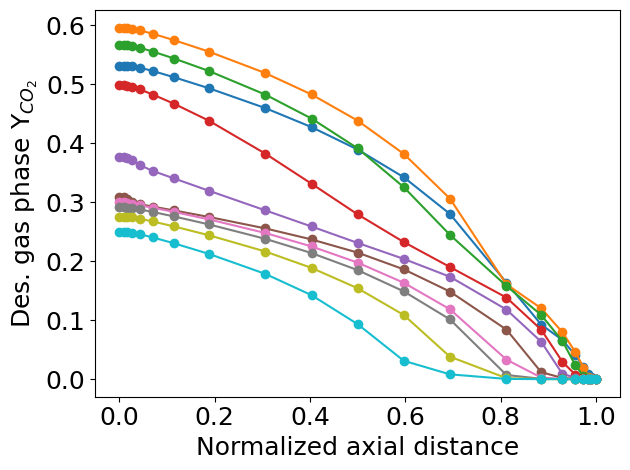

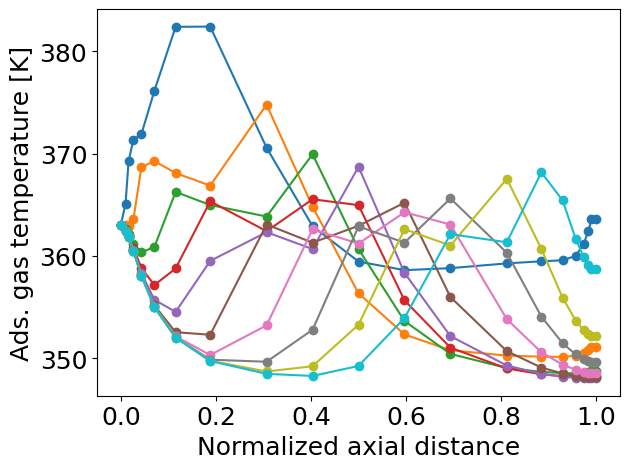

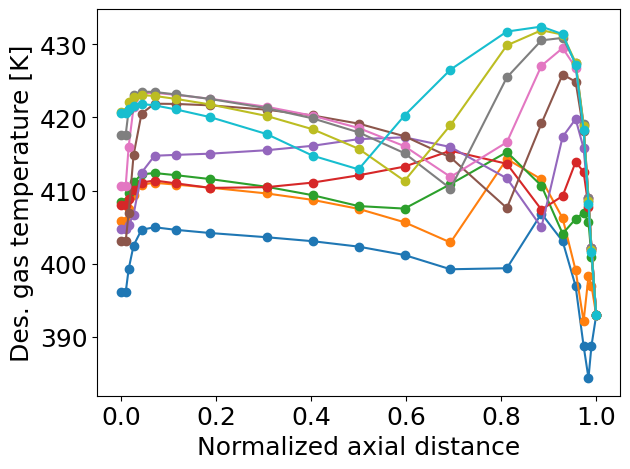

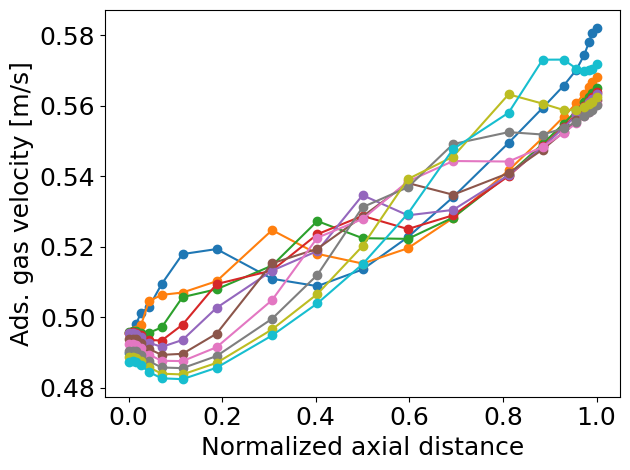

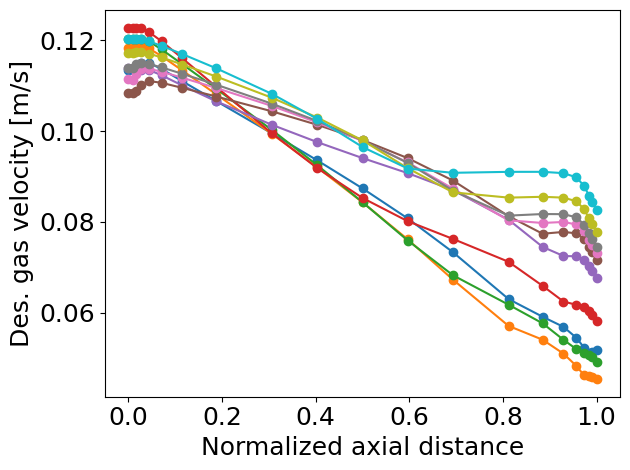

In [23]:
# draw 2D figure
y_ref = full_contactor_plotting(RPB, with_legend=False, save_option=True)

[0, 0.01, 0.016306894089533095, 0.026591479484724942, 0.04336244396414017, 0.07071067811865475, 0.11530715390799683, 0.18803015465431966, 0.3066187817586519, 0.403309, 0.5, 0.596691, 0.6933812182413481, 0.8119698453456803, 0.8846928460920032, 0.9292893218813453, 0.9566375560358599, 0.973408520515275, 0.9836931059104669, 0.99, 1] [0.4980905871576268, 0.49809058715783805, 0.49720588540952787, 0.49531591419785803, 0.49103969496491434, 0.48229800796233385, 0.466621620230994, 0.4380759237295284, 0.3820793910595248, 0.3311614819397701, 0.27928116885344245, 0.23231820078640011, 0.19010208378855736, 0.1382078618010166, 0.08399021640627183, 0.02932483477370344, 0.007322578157164483, 0.0020882776742732465, 0.0006831816097841641, 0.0003998365053146658, 1e-05]


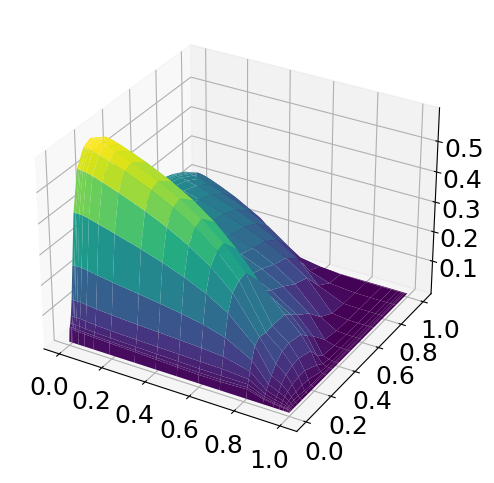

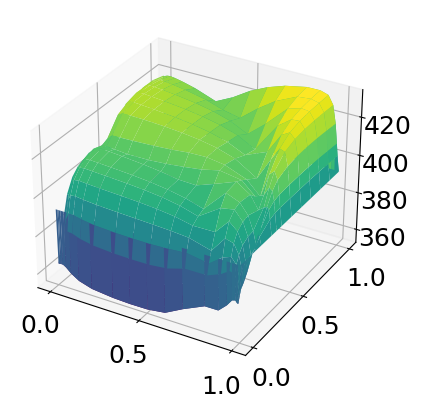

In [24]:
# draw 3D figure
model_plot_CO2g_RKH(RPB.des)
model_plot_Tg_RKH(RPB.des)

## Figure 4.5 

In [15]:
# create pyomo model
RPB2 = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

In [17]:
# load a solved model (MBDoE suggested design)
from_json(RPB2, fname="./Countercurrent_results/MBDoE_results/Tgin_des_393/Tgin_ads_361/Tgads361_Tgdes393_base.json.gz")

{'etime_load_file': 0.22886252403259277,
 'etime_read_dict': 0.4114835262298584,
 'etime_read_suffixes': 0.02252054214477539}

[8, 10, 11, 12, 13, 14, 15, 16, 17, 18]


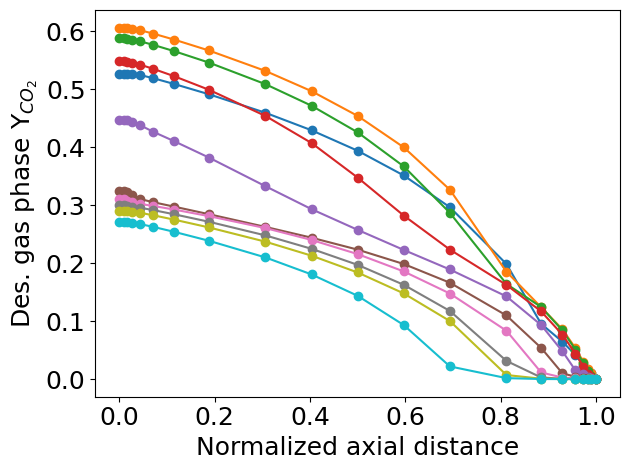

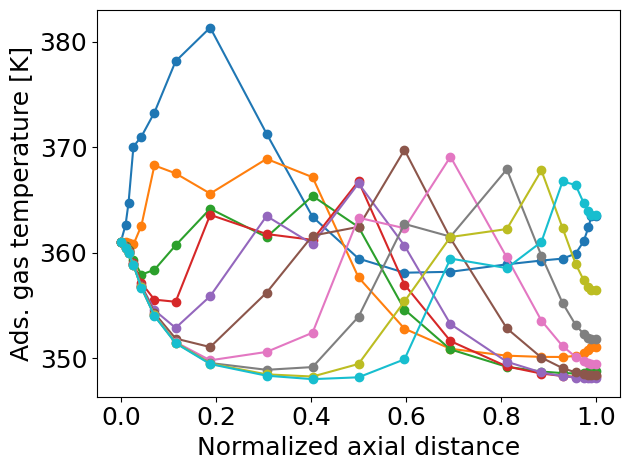

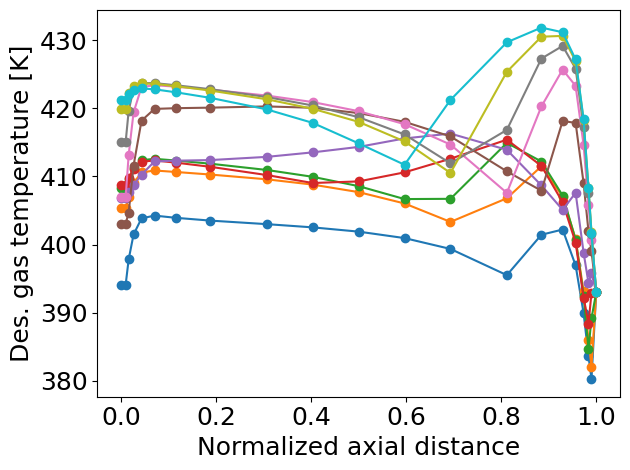

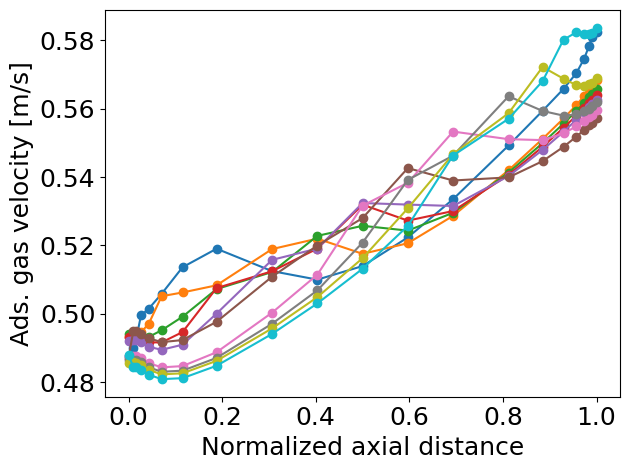

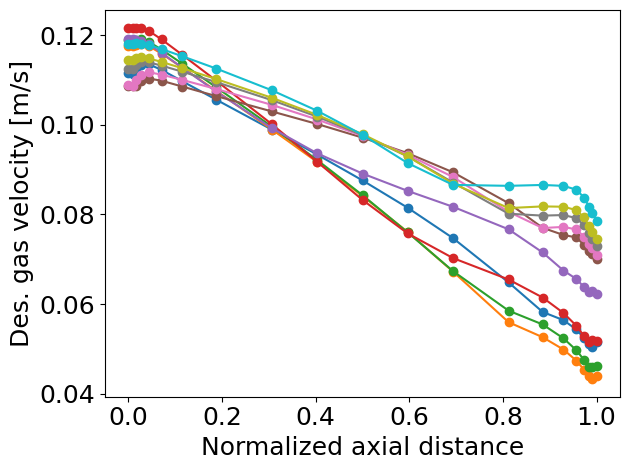

In [25]:
# draw 2D figure
y_ref = full_contactor_plotting(RPB2, with_legend=False, save_option=True)

[0, 0.01, 0.016306894089533095, 0.026591479484724942, 0.04336244396414017, 0.07071067811865475, 0.11530715390799683, 0.18803015465431966, 0.3066187817586519, 0.403309, 0.5, 0.596691, 0.6933812182413481, 0.8119698453456803, 0.8846928460920032, 0.9292893218813453, 0.9566375560358599, 0.973408520515275, 0.9836931059104669, 0.99, 1] [0.5484634770764488, 0.5484634770764487, 0.5477259889458695, 0.546181442972516, 0.5427279511285674, 0.5355942092538888, 0.5226546408052225, 0.4993209278523378, 0.454157586720376, 0.4073987445457877, 0.3477638853869103, 0.2821691163453968, 0.22346896839969682, 0.1626128744925084, 0.11686793731417643, 0.07673816565440114, 0.04380300734962226, 0.02164872952501256, 0.008739199228966566, 0.0030265710070252806, 1.000000000000224e-05]


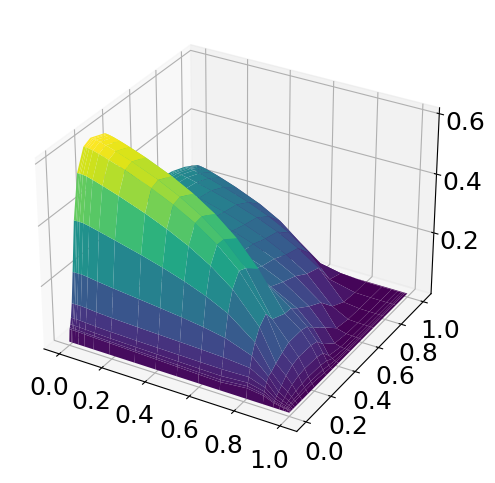

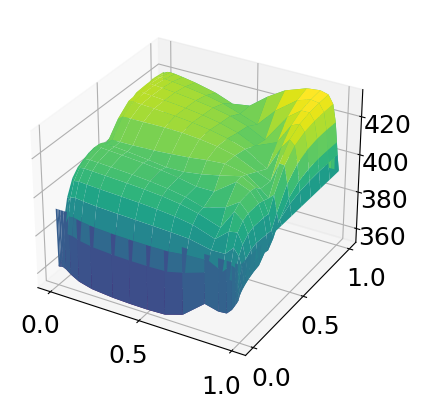

In [26]:
# draw 3D figures
model_plot_CO2g_RKH(RPB2.des)
model_plot_Tg_RKH(RPB2.des)